# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [117]:
# student: Yegor Turtsakov 2079

## Part 2 - Initial Preparations 

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [119]:
# Loading trainset (training dataset)
train_data = pd.read_csv('diabetes_train.csv')

# Loading dataset (test dataset)
test_data = pd.read_csv('diabetes_test.csv')

# Loading trainset (training dataset)
print("Test Data:")
print(test_data.head())

print("\nTrain Data:")
print(train_data.head())

# Splitting data into features (X) and target variable (y)
X_train = train_data.iloc[:, :-1]  # All columns except the last one
y_train = train_data.iloc[:, -1]   # The last column - target variable

X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]


Test Data:
    age  sex   bmi     bp     s1     s2    s3   s4      s5     s6  target
0  60.0  2.0  28.2  112.0  185.0  113.8  42.0  4.0  4.9836   93.0   178.0
1  55.0  2.0  22.9   81.0  123.0   67.2  41.0  3.0  4.3041   88.0   129.0
2  46.0  1.0  20.6   73.0  172.0  107.0  51.0  3.0  4.2485   80.0    53.0
3  58.0  1.0  22.8   91.0  196.0  118.8  48.0  4.0  4.9836  115.0   206.0
4  36.0  2.0  24.1  112.0  193.0  125.0  35.0  6.0  5.1059   95.0   163.0

Train Data:
    age  sex   bmi      bp     s1     s2    s3    s4      s5     s6  target
0  52.0  1.0  23.0  107.00  179.0  123.7  42.5  4.21  4.1589   93.0    50.0
1  22.0  1.0  18.6   97.00  114.0   57.6  46.0  2.00  3.9512   83.0   101.0
2  34.0  2.0  25.3  111.00  230.0  162.0  39.0  6.00  4.9767   90.0   181.0
3  38.0  2.0  26.8  105.00  181.0  119.2  37.0  5.00  4.8203   91.0   107.0
4  55.0  1.0  23.0   94.67  190.0  137.6  38.0  5.00  4.2767  106.0   146.0


In [120]:
# Statistical description of training and test datasets
print("Train Data Statistics:")
print(train_data.describe())

print("\nTest Data Statistics:")
print(test_data.describe())

Train Data Statistics:
              age         sex         bmi          bp          s1          s2  \
count  353.000000  353.000000  353.000000  353.000000  353.000000  353.000000   
mean    48.433428    1.461756   26.365439   94.599518  189.977337  115.864306   
std     13.362376    0.499243    4.517617   14.118033   34.745332   30.427219   
min     19.000000    1.000000   18.000000   62.000000  110.000000   41.600000   
25%     38.000000    1.000000   23.100000   84.000000  165.000000   96.000000   
50%     50.000000    1.000000   25.700000   93.000000  187.000000  113.400000   
75%     59.000000    2.000000   29.200000  105.000000  213.000000  135.600000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               s3          s4          s5          s6      target  
count  353.000000  353.000000  353.000000  353.000000  353.000000  
mean    50.228045    4.052635    4.636994   91.396601  152.243626  
std     13.185724    1.292732    0.526080  

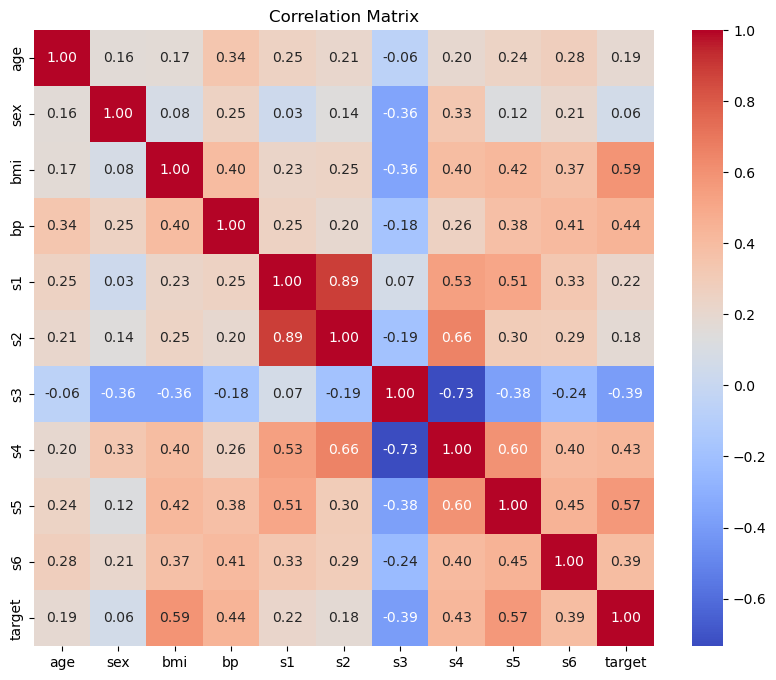

In [138]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

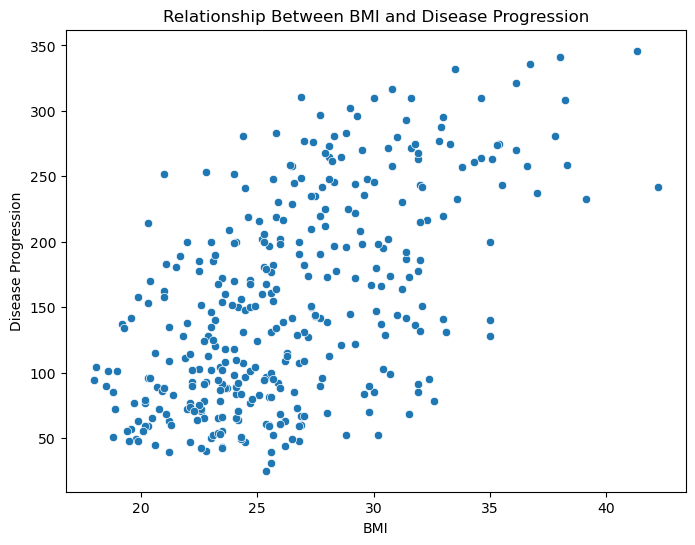

In [123]:
# Scatterplot to examine the relationship between BMI and target variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y=train_data.columns[-1], data=train_data)
plt.title("Relationship Between BMI and Disease Progression")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.show()

## Part 3 - Experiments

In [124]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [125]:
# Creating polynomial features of degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_features = poly.get_feature_names_out(X_train.columns)
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_features)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_features)


In [126]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly_df)
X_test_scaled = scaler.transform(X_test_poly_df)

In [127]:
# Defining a Pipeline for KNN
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('knn', KNeighborsRegressor())
])

# Hyperparameters for KNN
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__weights': ['uniform', 'distance']
}


In [128]:
# Initializing GridSearchCV for KNN
grid_knn = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=param_grid_knn,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# # Training the KNN model
grid_knn.fit(X_train, y_train)

print("Лучшие параметры для KNN:", grid_knn.best_params_)
print("Лучшее среднее значение MSE для KNN:", -grid_knn.best_score_)

Лучшие параметры для KNN: {'knn__n_neighbors': 10, 'knn__weights': 'distance'}
Лучшее среднее значение MSE для KNN: 3794.4523287905527


In [129]:
# Defining a Pipeline for a Decision Tree
pipeline_dt = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('dt', DecisionTreeRegressor(random_state=42))
])

# Hyperparameters for Decision Tree
param_grid_dt = {
    'dt__max_depth': [2, 3, 5, 7],
    'dt__min_samples_split': [2, 5, 10]
}


In [130]:
# Initializing GridSearchCV for Decision Tree
grid_dt = GridSearchCV(
    estimator=pipeline_dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Training the Decision Tree Model
grid_dt.fit(X_train, y_train)

print("Лучшие параметры для Decision Tree:", grid_dt.best_params_)
print("Лучшее среднее значение MSE для Decision Tree:", -grid_dt.best_score_)


Лучшие параметры для Decision Tree: {'dt__max_depth': 2, 'dt__min_samples_split': 2}
Лучшее среднее значение MSE для Decision Tree: 3738.647364006927


In [131]:
from sklearn.ensemble import RandomForestRegressor

# Defining a Pipeline for Random Forest
pipeline_rf = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('rf', RandomForestRegressor(random_state=42))
])

# Hyperparameters for Random Forest
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, None],
    'rf__min_samples_split': [2, 5]
}

# Initializing GridSearchCV for Random Forest
grid_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Training the Random Forest model
grid_rf.fit(X_train, y_train)

print("Best settings for Random Forest:", grid_rf.best_params_)
print("Best Average MSE for Random Forest:", -grid_rf.best_score_)

Best settings for Random Forest: {'rf__max_depth': None, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Best Average MSE for Random Forest: 3028.802064081015


In [139]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# Data preparation
X_train = train_data.drop(columns=['target'])  # ваши данные
y_train = train_data['target']

# Creating a pipeline
pipeline = make_pipeline(StandardScaler(), SVR())

# Defining Parameters for GridSearch
param_grid = {
    'svr__kernel': ['linear', 'rbf'],  # Попробуйте разные ядра
    'svr__C': [0.1, 1, 10, 100],
    'svr__gamma': ['scale', 'auto']
}

# GridSearch for Finding the Best Hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Results
print("Best parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)



Best parameters: {'svr__C': 0.95, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
Best MSE: 3092.7757942682256


In [133]:
# Collecting results
results = {
    'Model': ['KNN', 'Decision Tree', 'Random Forest', 'SVM'],
    'Best Parameters': [
        grid_knn.best_params_,
        grid_dt.best_params_,
        grid_rf.best_params_,
        grid_search.best_params_
    ],
    'Best Score (MSE)': [
        -grid_knn.best_score_,
        -grid_dt.best_score_,
        -grid_rf.best_score_,
        -grid_search.best_score_
    ]
}

# Creating a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

           Model                                    Best Parameters  \
0            KNN  {'knn__n_neighbors': 10, 'knn__weights': 'dist...   
1  Decision Tree   {'dt__max_depth': 2, 'dt__min_samples_split': 2}   
2  Random Forest  {'rf__max_depth': None, 'rf__min_samples_split...   
3            SVM  {'svr__C': 0.95, 'svr__gamma': 'scale', 'svr__...   

   Best Score (MSE)  
0       3794.452329  
1       3738.647364  
2       3028.802064  
3       3092.775794  


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [134]:
# Best Combination of Hyperparameters for SVM
best_params = {'C': 0.95, 'gamma': 'scale', 'kernel': 'linear'}

# Creating an SVM model with the best parameters
svm_model = SVR(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

# Train the model on the full training dataset
svm_model.fit(X_train_scaled, y_train)

# Prediction on training set
y_train_pred = svm_model.predict(X_train_scaled)

# Calculating MSE on training data
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (MSE) on training set: {mse_train}")

Mean Squared Error (MSE) on training set: 2867.7259119260375


## Part 5 - Apply on test and show model performance estimation

In [135]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Prediction on test dataset
y_test_pred = svm_model.predict(X_test_scaled)

# Calculating RMSE (Root Mean Square Error)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Root Mean Square Error (RMSE) on test set: {rmse_test}")

# Output of the first 5 predicted values ​​and actual values
print("The first 5 predicted values ​​and their actual values:")
for i in range(5):
    print(f"Predicted: {y_test_pred[i]:.2f}, Real: {y_test[i]:.2f}")


Root Mean Square Error (RMSE) on test set: 52.13228264020421
The first 5 predicted values ​​and their actual values:
Predicted: 195.32, Real: 178.00
Predicted: 108.43, Real: 129.00
Predicted: 83.83, Real: 53.00
Predicted: 169.09, Real: 206.00
Predicted: 185.89, Real: 163.00


In [136]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculating MAPE (Mean Absolute Percentage Error)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100
print(f"Mean Absolute Percentage Error (MAPE) on test set: {mape_test:.2f}%")


Mean Absolute Percentage Error (MAPE) on test set: 36.87%
